<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c2/Tema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTA**. Este material **es optativo** y está enfocado a ampliar los conocimientos de los alumnos que así lo deseen.


# Tema 2. Árboles de decisión.





En este notebook vamos a exponer una ampliación de la teoría y práctica de los árboles de decisión ya explicada en el vídeo correspondiente de este tema, con la finalidad de que los estudiantes puedan profundizar, si así lo desean, en esta materia.

Esta herramienta es simple pero poderosa y ampliamente utilizada en el análisis de datos. Se puede decir que ésta es una técnica muy versátil que puede ser empleada en áreas de trabajo de muy diversa índole, como pueden ser en el campo del diagnóstico médico, predicción meteorológica, etc.

Este tipo de herramientas, pueden ser utilizadas tanto para tareas de clasificación como de predicción, dependiendo de la naturaleza que tenga la variable de la clase (variable independiente o target): Si es discreta se utiliza un árbol de decisión y si es continua se usará un árbol de regresión.

Entre las finalidades que podemos asignar a los árboles de decisión, se encuentran las siguientes:


* Para tareas de clasificación. Es uno de los puntos principales de esta técnica, sobre el que nos centraremos en este trabajo.

* Para tareas de generalización. Descubrir una relación entre variables dependientes e independientes con el fin de predecir el valor de la variable dependiente de cara a un cierto escenario futuro. 

Se puede decir que un árbol de decisión, puede interpretarse como un conjunto de condiciones organizadas en una estructura jerárquica en formato de árbol ( de ahí su nombre), y que está formada por diferentes nodos que se interconectan con arcos (aquí llamados ramas) dirigidos, de tal manera que en esta estructura, se tendrían los siguientes nombres característicos de la misma:

* **Nodo raiz**. Con este nombre nos estamos refiriendo al nodo inicial de  esta estructura, de tal manera que sólo tiene ramas salientes y dentro de este nodo queda recogida el total de la población.

* **Nodos intermedios o hijos**. Estos nodos se caracterizan porque tienen ramas entrantes que provienen de los nodos padre y ramas salientes que van hacia los nodos hijos. En estas zonas se encuentran las preguntas que se hacen sobre un determinado atributo y en base a la respuesta que se tenga a esa pregunta se determinará cual es el próximo nodo hijo al que habrá que dirigirse. Por lo tanto, deberá haber un nodo hijo por cada tipo de respuesta.

* **Nodo terminal u hoja**. Aquí es donde termina la estructura del árbol pues es la parte final del mismo, y en consecuencia tan sólo existen ramas entrantes y se asocia con una etiqueta o valor que sirve para caracterizar a los datos que llegan al nodo.

* **Las ramas**, son los arcos que unen esta estructura, es decir permiten unir los nodos padres con los hijos.

En consecuencia, cada nodo va a representar una variable atributo ( de las utilizadas para poder construir la jerarquía), mientras que cada rama va a representar un estado de la variable. Como norma general se puede afirmar que cada nodo terminal representa el valor esperado de la variable clase o variable en estudio según la información contenida en el conjunto de datos utilizados para obtener el modelo. 

En consecuencia, y en base al formato de los árboles de decisión anteriormente expuesto, podemos decir que la clasificación de una instancia nueva, se realiza en base a una serie de preguntas sobre los valores de los atributos, entonces la etiqueta de la hoja a la que se llegue mediante este sistema de preguntas, será la clase que se asignará a la nueva observación.  

Un ejemplo gráfico de árbol de decisión puede ser el siguiente:

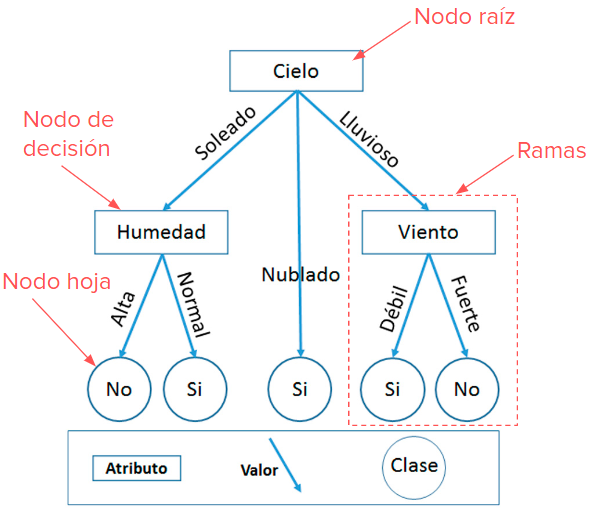

# Metodología genérica para construir árboles de decisión.

La idea general para construir este tipo de árboles es la de seguir una estrategia descendente, en el sentido de que se arranca de unos conceptos generales (los que contiene el nodo raiz) y se va descendiendo hacia conceptos más particulares a medida que la ramificación del árbol va creciendo. Debido a esta característica, este conjunto de métodos son conocidos dentro de este ámbito de estudio con la expresión anglosajona **"Top-Down induction of decision tres, TDIDT"**.

La idea básica de construcción de este tipo de árboles de decisión se sustenta en el dicho popular de "divide y vencerás". En línea con este principio, se arranca de un conjunto completo de datos, los que se encuentran en la raíz del árbol, y se determina un cierto criterio de partición, en base al cual el conjunto completo se divide en subconjuntos, de forma jerárquica y cada vez más pequeños, obteniendo de esta manera los nodos del árbol. Se sigue con este proceso de subdivisión del conjunto hasta conseguir que todos los nodos sean puros (es decir cuando los casos del nodo son de una misma clase), o bien hasta que se alcance el mínimo de pureza (es decir de homogeneidad de los datos). Al final de todo este proceso, a los nodos hoja se les asigna una etiqueta o valor determinado de la variable clase.

El problema que se tiene con esta metodología, es que si no se establece ningún límite en la construcción de los nodos del árbol, se termina cuando el nodo es totalmente puro, y entonces esta situación, lo que da lugar es a un sobreajuste de los datos, con los inconvenientes que esto tiene para extender las conclusiones a otra serie de datos. De esta manera, lo que se obtiene es un modelo muy específico y poco general y que por lo tanto tendrá malas predicciones para otro conjunto de datos. Es más, si además los datos contienen ruido ( debidos a errores en la medición de las variables), entonces el modelo lo que hará es ajustarse con casi exactitud a los datos de entrenamiento, lo que puede diferir del comportamiento general que queremos medir y predecir.

De esta manera se puede decir que que con un árbol de decisión, lo que se pretende es el mayor nivel de pureza posible y además utilizando para ello la menor cantidad de nodos posibles, en consecuencia cuanto menor cantidad de nodos se tenga y mayor numero de instancias posibles, mejor para el objetivo que vamos buscando.

Para construir el árbol de decisión, lo que debemos intentar siempre es hacer las particiones de manera que éstas sean mínimas y además que la impureza obtenida sea la mínima posible.

# Criterios para parar la construcción del árbol.

No existe un criterio universalmente aceptado para esto, pero sí consejos que intentan conseguir un árbol de decisión pequeño pero al mismo tiempo eficiente para hacer predicciones o estimaciones futuras. Algunos criterios a tener en cuenta para parar la construcción de un árbol, pueden ser los siguiente (reglas pre-poda):

* Evaluar la pureza que tiene un determinado nodo. Indudablemente, cuando un nodo sólo tiene datos de una determinada clase, hay que parar el crecimiento del mismo por esa rama, al ser totalmente puro. No obstante y aunque esto es lo deseado, también se puede establecer un cierto nivel de pureza para parar la ramificación, una vez se ha conseguido ese nivel.

* Definir un nivel de profundidad. Con la finalidad de no construir árboles muy complejos, también se suele asignar con carácter previo a su construcción un nivel de profundidad, y una vez alcanzada esta profundidad, se detiene la ramificación por esa zona del árbol.

* Nivel mínimo de casos para un nodo. Igualmente se puede poner una frontera para seguir ramificando un nodo, de tal manera que si durante el proceso, se llega a alcanzar un número mínimo de casos, entonces se pararía la ramificación de ese nodo.

# Ventajas y desventajas de los árboles de decisión.

Entre las ventajas de este tipo de métodos, podemos encontrar las siguientes:

* Una mera visión del mismo, explica completamente el procedimiento a seguir para hacer la clasificación o predicción.

* El método a seguir es muy fácil y se basa en simples reglas del tipo SI---ENTONCES.

* Los árboles de decisión por regla general no asumen ningún tipo de suposición sobre distribución que siguen los datos a ajustar, lo que implica no tener que garantizar este tipo de cumplimientos muy frecuente en el campo estadístico.

* Son métodos muy flexibles, para trabajar tanto con atributos numéricos como nominales.

* Tienen una elevada capacidad predictiva, con no mucho esfuerzo computacional.

Entre las desventajas, merece la pena destacar las siguientes:

* Son herramientas muy sensibles al conjunto de datos entrenados

* La presencia de ruido en los datos, puede hacer que el modelo sea inestable, en el sentido de que un pequeño cambio en los datos puede generar un cambio importante en el árbol generado.

* Las decisiones que se toman en base a estos árboles están muy condicionadas por la variable que se utiliza como raíz.

# Decision Boundary.

La construcción de los árboles de decisión se basa en la idea intuitiva de ir obteniendo paso a paso una serie de fronteras de decisión, que de forma gráfica lo vamos a explicar con los siguientes gráficos:

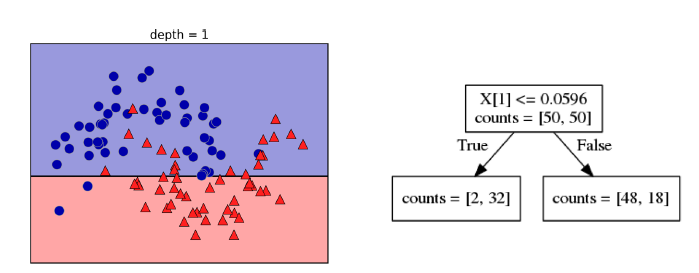

En el gráfico superior se puede observar el primer paso del procedimiento. Va buscando separar las observaciones de manera que en cada nueva clase haya la mayor cantidad de pureza posible. Podemos observar en la zona de la derecha hoja izquierda que en una zona quedan 2 elementos de un tipo (azul) y 32 del otro ( rojo), lo que queda confirmado al ver la partición inferior del gráfico de la izquierda. Lo mismos ocurre con la información que contiene la rama de la derecha: 48 de un tipo y 18 del otro. Esta última zona contiene más impureza (mezcla de casos) que la anterior. 

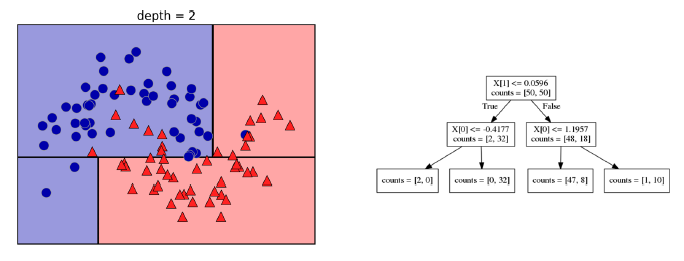

Este segundo gráfico, muestra lo que ocurre en el segundo paso. Se mantiene la partición del paso anterior, pero se añade otra que consiste en dividir la zona de arriba en dos mitades, de tal manera que ahora las dos nuevas zonas contienen menos impureza que en el paso anterior como bien puede observarse en este gráfico.

Para un mayor detalle de estos métodos y ver cómo se puede conseguir mediante programación python ver este ejemplo, se aconseja al lector interesados que mire [este enlace](https://github.com/ashishthanki/Decision_Trees/blob/master/Decision_Tree_Iris_dataset.ipynb) donde se puede ver con sumayor detalle este procedimiento, vía código python.

Igualmente existe un vídeo en youtuve donde con se explica de forma resumida todo esto, este vídeo se puede [ver en este enlace](https://www.youtube.com/watch?v=kqaLlte6P6o).


# Algoritmos para construir árboles.

La principios que sustentan la metodología general de construcción de un árbol de decisión, ya se han expuesto en los párrafos precedente, pero existen mucho algoritmos que facilitan su construcción, en base a las ideas que subyacen a esta metodología.

Entre estos algoritmos, se encuentran los siguiente:

* Algoritmo CHAID (Chi-squared Automatic Interaction Detection) que fue implementado por Kass en 1980.

* El método CART (Clasification ans regresión Trees), ideado por Breiman en 1984.

* El algoritmo ID3, desarrollado por Quinlan en 1986, que posteriormente evolucionó al método C4.5 y el C5.0

En este tema nos vamos a centrar en el algortimo CART que además es el que utiliza Scikit Learn para implementar este tipo de árboles de decisión.

## Algoritmo CART



Para mostrar cómo funciona el algoritmo cart, a continuación se muestra un ejemplo muy utilizado en el mundo de árboles de decisión. Se trata de datos que indican que dependiendo de la situación meteorológica existente, se juega o no a un determinado juego. Los datos son los siguientes:

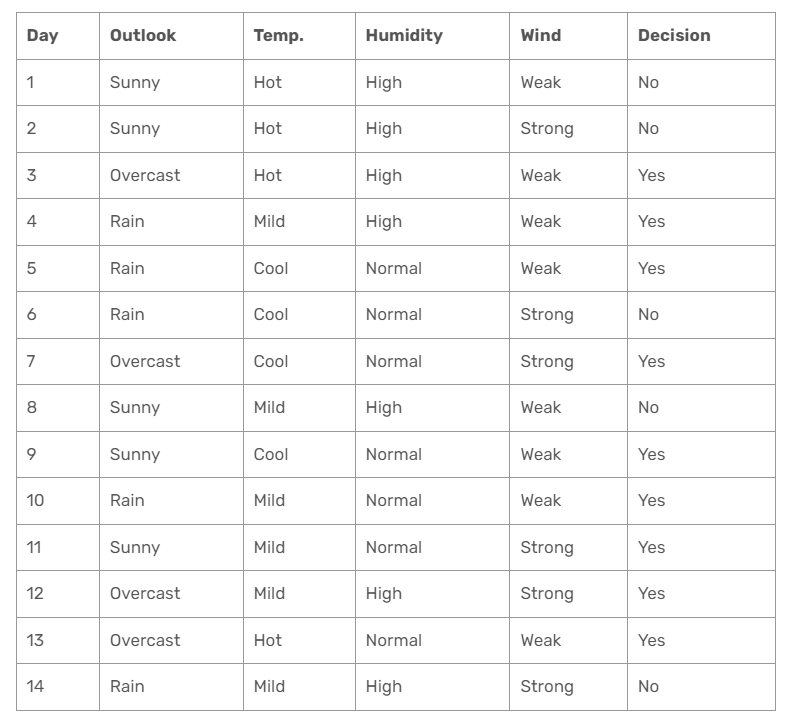



Vamos a utilizar el índice de Gini (es el que utiliza Scikit Learn, aunque también se puede usar la medida de la entropia), para desarrollar este ejemplo. Este índice se define mediante la siguiente fórmula:

$$Gini = 1-\sum_{i=1}^{n. clase}P_{i}^{2}$$

Una vez definida la fórmula, vamos a ver a continuación cómo se usa y calcula para cada una de las categorías o variables independientes, que se pueden ver en la tabla anterior. 

**Variable Outlook.**

Para un mejor cálculo del índice de gini, procedemos a elaborar una tabla de doble entrada en base a los datos que tenemos en la tabla:

|Outlook|Yes|NO|total|
|----------|-------|--------|------------|
|sunny|2|3|5
|Overcast|4|0|4
|Rain|3|2|5

Calculemos ahora el índice de Gini.


Gini(Outlook=Sunny) = $1 – (2/5)^2 – (3/5)^2$ = 1 – 0.16 – 0.36 = 0.48

Gini(Outlook=Overcast) = $1 – (4/4)^2 – (0/4)^2$ = 0

Gini(Outlook=Rain) = $1 – (3/5)^2 – (2/5)^2$ = 1 – 0.36 – 0.16 = 0.48

Ahora, para calcular el índice que correspondería a esta variable, calculamos una media ponderada de cada uno de los indices calculados anteriormente:

Gini(Outlook) = (5/14) x 0.48 + (4/14) x 0 + (5/14) x 0.48 = 0.171 + 0 + 0.171 = 0.342

**Variable Temperature.**

Igual que se ha hecho para el caso anterior, se procedería con la variable Temperatura.

|Temperature|Yes|No|Total|
|-----------|-------|----|----|
|Hot|2|2|4|
|Cool|3|1|4|
|Mild|4|2|6|

Los cálculos para el índice de Gini son los siguientes:

Gini(Temp=Hot) = $1 – (2/4)^2 – (2/4)^2$ = 0.5

Gini(Temp=Cool) = $1 – (3/4)^2 – (1/4)^2$ = 1 – 0.5625 – 0.0625 = 0.375

Gini(Temp=Mild) = $1 – (4/6)^2 – (2/6)^2$ = 1 – 0.444 – 0.111 = 0.445

y promediando:

Gini(Temp) = (4/14) x 0.5 + (4/14) x 0.375 + (6/14) x 0.445 = 0.142 + 0.107 + 0.190 = 0.439

**Variable Humidity**.

Para esta variable, la tabla de doble entrada queda de la siguiente manera:

|Humidity|Yes|No|Total
|-----|------|---|----|
|Hight|3|4|7|
|Normal|6|1|7|

Los índices de Gini:

Gini(Humidity=High) = $1 – (3/7)^2 – (4/7)^2$ = 1 – 0.183 – 0.326 = 0.489

Gini(Humidity=Normal) = $1 – (6/7)^2 – (1/7)^2$ = 1 – 0.734 – 0.02 = 0.244

Y la media ponderada sería:

Gini(Humidity) = (7/14) x 0.489 + (7/14) x 0.244 = 0.367

**Variable Wind**

Tabla de doble entrada.

|Wind|Yes|No|Total|
|----|---|--|-----|
|Weak|6|2|8|
|Strong|3|3|6|

Indices de Gini:

Gini(Wind=Weak) = $1 – (6/8)^2 – (2/8)^2$ = 1 – 0.5625 – 0.062 = 0.375

Gini(Wind=Strong) = $1 – (3/6)^2 – (3/6)^2$ = 1 – 0.25 – 0.25 = 0.5

La media ponderada sería la siguiente:

Gini(Wind) = (8/14) x 0.375 + (6/14) x 0.5 = 0.428

Recapitulando los índices de Gini obtenidos para cada variable independiente son los siguientes:

|Feature | índi.Gini|
|--------|-----|   
| Outlook|0.342|
|Temperature|0.439|
|Humidity|0.367|
|Wind|0.428|

La feature con menor índice sería Outlook, y por lo tanto sería la que inicia la ramificación. Ahora nos quedaría este árbol inicial.

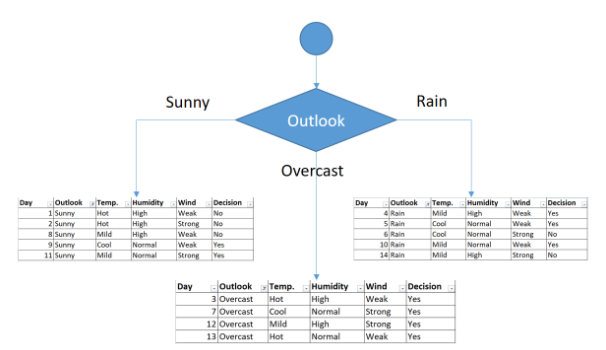


Como puede verse la tabla que cuelga de Overcast tiene sus valores de decisión en YES y por lo tanto no presenta ninguna impureza y ahí se terminaría esta ramificación. Por lo tanto quedaría de la siguiente manera:

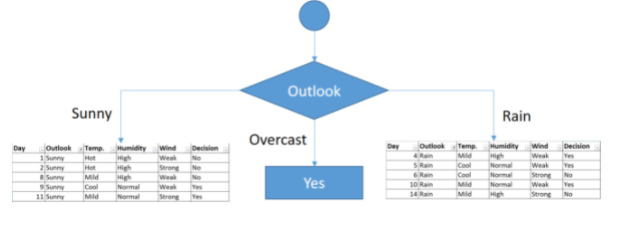

Ahora tocaría aplicar lo mismo a cada uno de los subconjuntos que cuelgan de la rama izquierda y derecha de la figura anterior.

Empezamos por la siguiente tabla

|Dia|Outlook|Temp.|Humidity|Wind|Decision|
|---|-------|-----|--------|----|--------|
|1|Sunny|Hot|Hight|Weak|No|
|2|	Sunny|	Hot|	High|	Strong|	No|
|8|	Sunny|	Mild|	|High|	Weak|	No|
|9	|Sunny|	Cool|	Normal|	Weak|	Yes|
|11|	Sunny|	Mild|	Normal|	Strong|	Yes|

**Variable temperature**

Tabla doble entrada

|Temperature|Yes|NO|Total|
|-----------|---|--|----|
|Hot|0|2|2
|Cool|1|0|1|
|Mild|1|1|2|


Índices de Gini:

Gini(Outlook=Sunny y Temp.=Hot) = $1 – (0/2)^2 – (2/2)^2$ = 0

Gini(Outlook=Sunny y Temp.=Cool) = $1 – (1/1)^2 – (0/1)^2$ = 0

Gini(Outlook=Sunny y Temp.=Mild) = $1 – (1/2)^2 – (1/2)^2$ = 1 – 0.25 – 0.25 = 0.5

El promedio ponderado:

Gini(Outlook=Sunny y Temp.) = (2/5)x0 + (1/5)x0 + (2/5)x0.5 = 0.2

**Variable Humedad**

Tabla doble entrada

|Humedad|Yes|No|Total|
|-------|---|--|-----|
|Hight|0|3|3|
|Normal|2|0|2|

Gini(Outlook=Sunny y Humidity=High) = $1 – (0/3)^2 – (3/3)^2$ = 0

Gini(Outlook=Sunny y Humidity=Normal) = $1 – (2/2)^2 – (0/2)^2$ = 0

Gini(Outlook=Sunny y Humidity) = (3/5)x0 + (2/5)x0 = 0


**Variable wind**

|wind|Yes|NO|Total|
|----|---|--|-----|
|Weak|1|2|3
|Strong|1|1|2

Gini(Outlook=Sunny y Wind=Weak) = $1 – (1/3)^2 – (2/3)^2$ = 0.266

Gini(Outlook=Sunny y Wind=Strong) = $1- (1/2)2 – (1/2)2$ = 0.2

Gini(Outlook=Sunny y Wind) = (3/5)x0.266 + (2/5)x0.2 = 0.466

Como vemos la feature que menor índice Gini tiene es Himidity. Por lo tanto nos qudaría el siguiente árbol

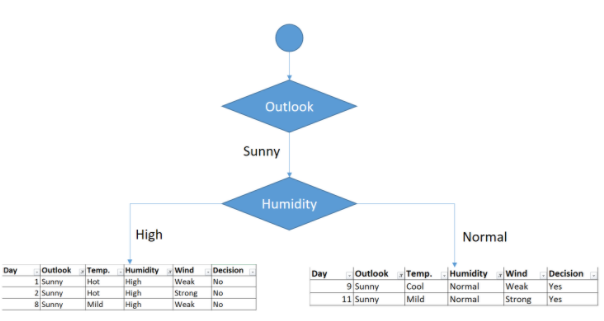


Como puede observarse, hemos conseguido las dos hojas finales, pues hemos separado las decisiones Yes de la No, y en consecuencia las dos hojas ya no tienen ninguna impureza y aquí se terminaría la ramificación por este lado. Nos quedará en consecuencia la siguiente figura:

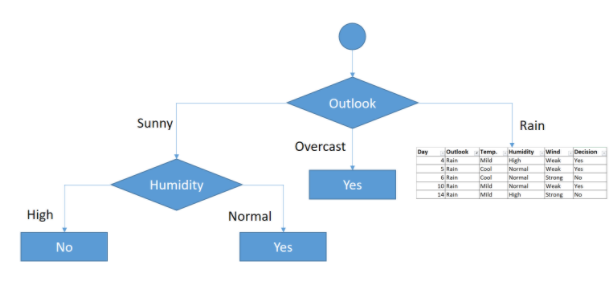

Nos quedaría ahora desarrollar la ramificación que nos queda a la derecha, cuya tabla sería la siguientes:

|Dia|	Outlook|	Temp.|	Humidity|	Wind1|	Decision|
|---|----------|---------|----------|--------|----------|
|4|	Rain|	Mild|	High|	Weak|	Yes|
|5|	Rain|	Cool|	Normal|	Weak1|	Yes|
|6|	Rain|	Cool|	Normal|	Strong|	No|
|10|	Rain|	Mild|	Normal|	Weak|	Yes|
|14|	Rain|	Mild|	High|	Strong|	No|

Haciendo el mismo procedimiento que antes, se obtienen los siguientes índices de Gini:

|Feature|	ind. Gini|
|-------|-------------|
|Temperature|	0.466|
|Humidity|	0.466|
|Wind|	0|

Por lo tanto elegimos la variables Wind para dividir el nodo y nos quedará:

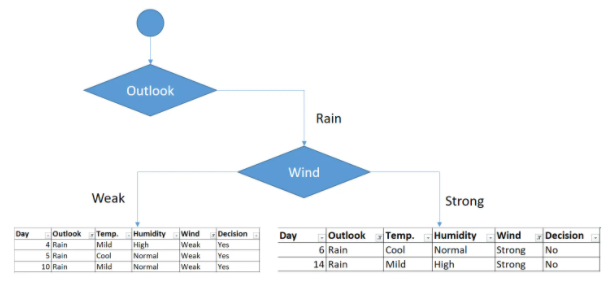

Como puede verse las dos tablas finales separan perfectamente las categorías y están libres de impurezas. Al final el resultado que se tiene es el siguiente:

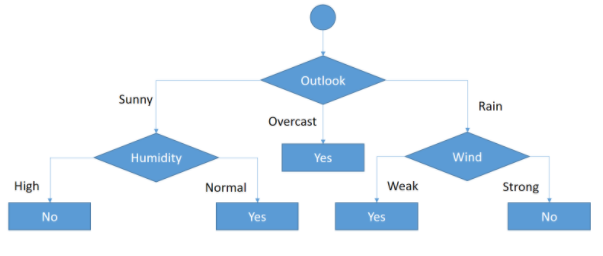




Al igual que el índice de Gini, nos mide el nivel de impureza de un nodo, también existe otro idicador de esta impureza que es la entropia, que es una medida de "desorden" en una muestra de información. La medida de la entropia se realiza en base a la siguiente fórmula:

$$ Entropia_i=-\sum_{k=1}^{n}p_{i,k}\cdot log_2(p_{i,k})$$

Siendo $p_{i,k}$ la probabilidad que tiene un elemento en un determinado nodo.

Como puede verse en la fórmula el cálculo de la impureza no es lo mismo que con la utilización del índice de Gini y en consecuencia los resultados finales que se obtengan en la construcción del modelo pueden ser diferentes.

El nivel de medida utilizando este indicador es similar al del índice de Gini, es decir a menor valor del mismo, menor nivel de impureza del nodo.

Un ejemplo de cómo calcular esta entropía puede ser el siguiente:

Denotemos por D el número de elementos de un conjunto de entrenamiento, que está constituido por P elementos positivos y N elementos negativos, entonces la entropía en este caso será igual a:

$$-(P/D)log_{2}(p/T)-(N/D)log_{2}(N/D)$$

En el ejemplo que hemos visto antes para desarrollar la estrategia de calcular el árbol de decisión mediante el método CART, si consideramos como elemento positivo la decisión Yes ( hay 9 casos) y como elemento negativo, la decisión NO (hay 5 casos), la entropía será la siguiente:

$$Entropia([9+, 5-])=-(9/14)log_{2}(9/14)-(5/14)log_{2}(5/14)=0.94$$


## Algoritmo  ID3.

Con el fin de no alargar en exceso este documento, se ha desarrollado este algoritmo en un documento diferenciado de este, y en consecuencia el lector interesado en el mismo puede ver sus fundamentos leyendo el fichero denominado *AlgoritmoID3.pdf* que se encuentra en la misma carpeta que el presente notebook.



# Regresión con árboles de decisión.

En apartados anteriores, hemos hecho ajustes donde la variable dependiente (target), admitía categorías ( era una variable categórica). Sin embargo la metodología de árboles de decisión también se puede aplicar para hacer regresiones, en cuyo caso la variable dependiente deberá ser de tipo numérico continuo. 

El procedimiento para hacer esto es muy similar al que se ha usado para el caso de clasificación, pero con sus particularidades, pues si bien en los casos de clasificación, hemos dicho que se pueden utilizar entre otras medidas de impureza el índice de Gini y la entropía, en el caso de la regresión se deberá utilizar el **error cuadrático medio** ya que en este caso estamos trabajando con variables aleatorias continuas (se podría trabajar también con otros tipos de medida de ajuste de los datos como por ejemplo "mean absolute error" o MAE). Definiremos esta medida de la siguiente manera:

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i )^2$$

Representando en la anterior expresión por y el valor real y por y sombrero el valor de la predicción. Lo que se pretende con este valor es ir cortando por los valores mínimos del mismo.

Veamos cómo construir este árbol con un ejemplo sencillo en plan didáctico a fin de que se entienda el método que se utiliza. Supongamos tenemos los siguientes datos:

|X|1|2|3|4|5|6|7|8|9|10|11|12|13|14|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|y|1|1.2|1.4|1.1|1|5.5|6.1|6.7|6.4|6|6|3|3.2|3.1|

Veamos por pasos cómo se procede a construir el árbol de regresión.

**Paso 1**.

Ordenaremos los datos en base a la variable X (paso ya hecho tal y como se presentan los datos). A continuación hacemos el promedio de las dos primeras columnas de la variable X y calculemos su promedio (1+2)/2=1.5. Ahora dividimos este conjunto de datos en dos partes que denominaremos parte A ( para X < 1.5) y parte B ( para X >=5).

De acuerdo con este criterio, la parte A sólo contiene un punto (X=1, y=1) y la parte B contendrá el resto de los pares de puntos. A continuación calculamos el promedio de todos los valores de y en la parte A y hacemos lo mismo para la parte B. Estos dos valores son la salida del árbol de decisión para X < 1.5 y X >=1.5. Usando los valores pronosticados y originales, calculamos el error cuadrático medio y lo anotamos.

**Paso 2**

A continuación haremos un proceso similar, pero en esta ocasión calcularemos el promedio de los dos siguientes valores de X ((2+3)/2=2.5), y en esta ocasión dividiremos el conjunto de datos en dos partes para X< 2.5 y X>=2.5 y construiremos como antes, la parte A y la parte B y predecimos los resultados y encontraremos el error cuadrático medio como se hizo en el paso 1.

Este proceso se seguirá haciendo para cada par de valores siguientes.

**Paso 3**

De esta manera hemos construido n-1 errores cuadráticos medios (si tenemos n números), y entonces para elegir el número en el que hacer nuestra primera división será aquel que nos da un error cuadrático medio menor. En este caso será el punto X=5.5 y en consecuencia en el primer paso el árbol se dividirá en dos partes: X<5.5 y X>=5.5. De esta manera ya tendríamos definido el nodo raíz, y el resto de nodos se irán obteniendo de forma recursiva y en un formato similar a como se comentado aquí.

Así pues la idea del método es encontrar el punto de la variable independiente para dividir el conjunto de datos en dos mitades de modo que se vaya minimizando el error cuadrático medio ( aunque [scikit learn permite tener en cuenta otras posibilidades de medidas de error](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) ). El algoritmo se hace de forma repetitiva hasta formal el árbol de decisión que se va buscando.

Más adelante veremos qué árbol de decisión obtendríamos para este ejemplo con scikit learn.

Para un ejemplo un poco más detallado de esta metodología, [mirar en este enlace](https://www.saedsayad.com/decision_tree_reg.htm).

# Decisión Tree en `scikit-learn`

Antes de nada decir que para resolver este tipo de problemas, `scikit-learn` en el momento de escribir estas líneas, no cuenta con ningún procedimiento que permita implementar los algoritmos ID3 o C4.5 ya comentados anteriormente. Sin embargo, en Github sí podemos encontrar algún desarrollo en python que permita elegir estos métodos. Por ejemplo [podemos acudir a este enlace](https://github.com/loginaway/DecisionTree) para poder utilizar los métodos comentados anteriormente.

La librería `scikit-learn` tiene [implementados procedimientos](https://scikit-learn.org/stable/modules/tree.html#tree) que nos facilitan enormemente la construcción de este tipo de árboles de decisión. Para ello, se pueden utilizar dos procedimientos que sirven cada uno de ellos para resolver problemas de clasificación ([DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) ) por una parte, o de regresión ([DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) ) por otra.

##  `DecisionTreeClassifier`.

Esta clase tiene una serie de hiperparámetros de entro los cuales merece la pena destacar los siguientes:

* **criterion**. Puede tomar los valores "gini" o "entropia" que sirven para medir la pureza de los nodos que se van creando.

* **splitter**: puede tomar los valores best (valor por defecto) y random. Normalmente, en la construcción del árbol de decisión se elige dividir cada nodo en un punto óptimo (basado en la impureza dada gini o en la ganancia de información de la entropía). Sin embargo, sería más rápido, y posiblemente no mucho peor, utilizar una división aleatoria. Para esto se puede utilizar este parámetro. Para ver un ejemplo de esto se puede [visitar esta página web](https://www.kaggle.com/code/drgilermo/playing-with-the-knobs-of-sklearn-decision-tree/notebook).

* **max_deph**. Es un valor entero que se utiliza para determinar el nivel de desarrollo del árbol, de tal manera que al utilizar este parámetro, el árbol que se construya no tendrá más de los niveles indicados por este parámetro.

* **min_samples_split**. Su valor por defecto es 2 e indica el número mínimo de observaciones que debe tener un nodo para que se pueda dividir.

* **min_samples_leaf**. Similar al anterior parámetro, pero en este caso para referirse a las hojas del árbol.

* **min_weight_fraction_leaf**. Es la fracción mínima ponderada necesaria para estar en un nodo hoja

* **class_weight**. Los pesos asociado a las clases, se deben facilitar en la forma: {class_label: wight}



##  `DecisionTreeRegressor`.



En los problemas de regresión el concepto de clases desaparece, lo cual afecta a los hiperparámetros `class_weight` y `criterion`, el primero no aplica y el segundo puede tomar los siguientes valores para el caso de regresión:



*   `criterion` = {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}

Es decir, ahora pasamos a emplear métricas que permitan evaluar el error de predicciones numéricas continuas.

Con respecto al resto de hiperparámetros, seguirá siendovalido lo indicado en el apartado anterior.


# Ejemplo de Clasificación.

Para ir entrando en materia, veamos inicialmente cómo resuelve scikit learn los problemas teóricos que hemos visto anteriormente, para ello procedemos a cargar las librerías necesarias y los datos correspondientes. 

In [ ]:
## importamos dependencias
from sklearn import tree #Para resolver el árbol
import pandas as pd # Para crear el dataframe
import pydotplus # Para ver el árbol generado
from IPython.display import Image  # PAra mostrar la imagen del gráficoTo Display a image of our graph

NOTA: `pydotplus` se utiliza para dar un formato más estético al árbol de decisión generado por scikit learn. Para mayor detalle se puede acudir a [este enlace](https://www.analyticslane.com/2018/11/09/visualizacion-de-arboles-de-decision-en-python-con-pydotplus/).

In [ ]:
#Creamos el dataset
#creamos un dataframe vacío
jugar_df = pd.DataFrame()

#añadimos campo outlook
jugar_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 
                     'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast',
                     'overcast', 'rain']

#añadimos campo temperature
jugar_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

#añadimo campo humidity
jugar_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

#añadimos campo windy
jugar_df['Wind'] = ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong',
                   'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong']

#añadimos campo play
jugar_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']


#Mostramos todos los datos que hemos generado
print(jugar_df)

     Outlook Temperature Humidity    Wind Play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3       rain        mild     high    weak  yes
4       rain        cool   normal    weak  yes
5       rain        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9       rain        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13      rain        mild     high  strong   no


In [ ]:
# Convertimos las variables categórica en variables dummy, decir con valores 0 ó 1.
# Por ejemplo la variable Outlok tiene tres categorías, por lo tanto creamos tres columnas nuevas,
# de tal manera que por ejmplo la columna Outlook_overcast tendrá el valor cero, si la columna Outlook
# no tiene el valor overcast y un uno si tiene ese valor.

one_hot_data = pd.get_dummies(jugar_df[ ['Outlook', 'Temperature', 'Humidity', 'Wind'] ])
#Mostramos el nuevo conjunto de datos
one_hot_data

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


**NOTA:** Como podemos ver, en scikit learn necesitamos generar variables de tipo dummy para trabajar con datos categóricos. Si queremos evitar esto, [en github podemos encontrar](https://github.com/m4jidRafiei/Decision-Tree-Python-) un desarrollo de deicision tree, sin necesidad de hacer esta transformación. Además ahí se puede ver cómo obtener el árbol de decisión también para los datos que se han utilizado en este tema.

Una vez creada toda la infraestructura que necesitamos procedemos a crear y ajustar el modelo

In [ ]:
# Generamos el modelo del clasificador.
clf = tree.DecisionTreeClassifier()
# Entrenamos el modelo
clf_train = clf.fit(one_hot_data, jugar_df['Play'])

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[6] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[8] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="X[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 8 ;
9 [label="X[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsam

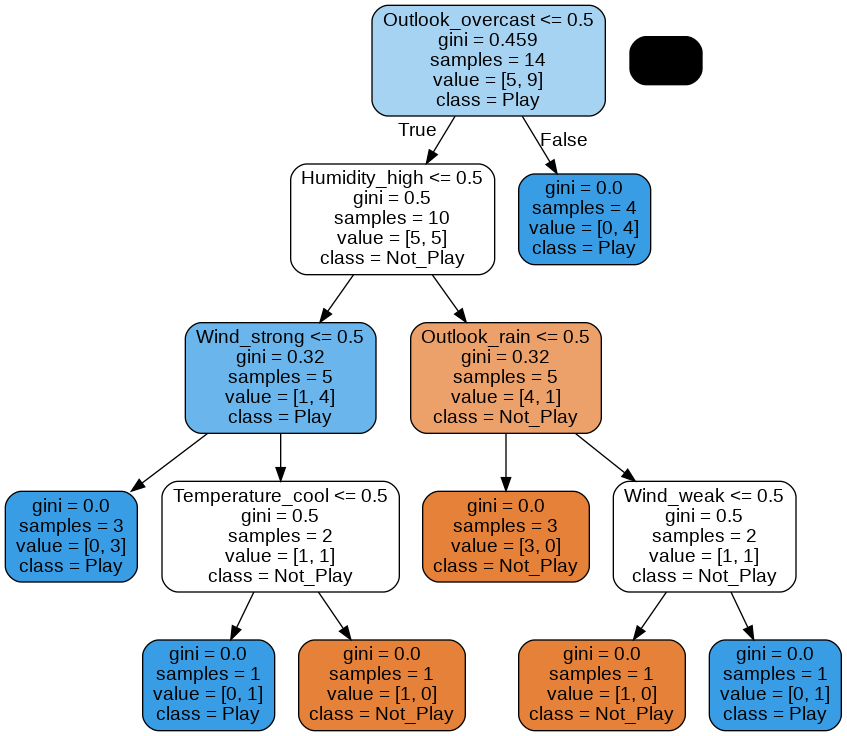

In [ ]:
# imprimimos el árbolo a un formato DOT.
print(tree.export_graphviz(clf_train, None))

#creamos Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
# creamos el gráfico obtenido desde los datos en formato DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostramos el gráfico
Image(graph.create_png())

# Ejemplo sencillo de regresión.

Veamos cómo resuelve scikit-learn el **ejemplo simple de regresión**, que hemos visto anteriormente. En primer lugar creamos el conjunto de datos.

In [ ]:
datos_df = pd.DataFrame()

#creamos la variable X
datos_df['X'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#creamos la variable y
datos_df['y']=[1,1.2,1.4,1.1,1,5.5,6.1,6.7,6.4,6,6,3,3.2,3.1]

print(datos_df)

     X    y
0    1  1.0
1    2  1.2
2    3  1.4
3    4  1.1
4    5  1.0
5    6  5.5
6    7  6.1
7    8  6.7
8    9  6.4
9   10  6.0
10  11  6.0
11  12  3.0
12  13  3.2
13  14  3.1


A continuación procedemos a hacer el ajuste, pero haciendo una distinción, utilizando para ello el hiperparámetro max_depth de scikit learn, que indica el número de niveles del árbol hasta el que queremos llegar. Haremos una distinción entre 2 niveles y 5 niveles 

In [ ]:
clf_2 = tree.DecisionTreeRegressor(max_depth = 2)
clf_5 = tree.DecisionTreeRegressor(max_depth = 5)

clf_2 = clf_2.fit(datos_df['X'].values.reshape(-1,1),datos_df['y'])
clf_5 = clf_5.fit(datos_df['X'].values.reshape(-1,1),datos_df['y'])


Ahora sacamos el gráfico del árbol obtenido

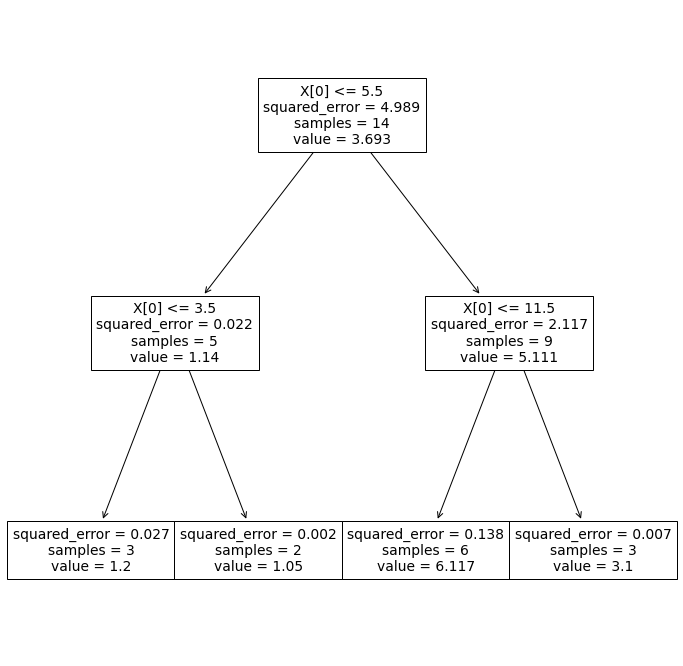

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
tree.plot_tree(clf_2);

In [ ]:
# hacemos ahora predicciones para luego poder sacar el gráfico

X_test = np.arange(1, 14, 0.01)[:, np.newaxis]
y_2 = clf_2.predict(X_test)
y_5 = clf_5.predict(X_test)

Una vez tenemos ya todo preparado, es hora de sacar el gráfico corerspondiente

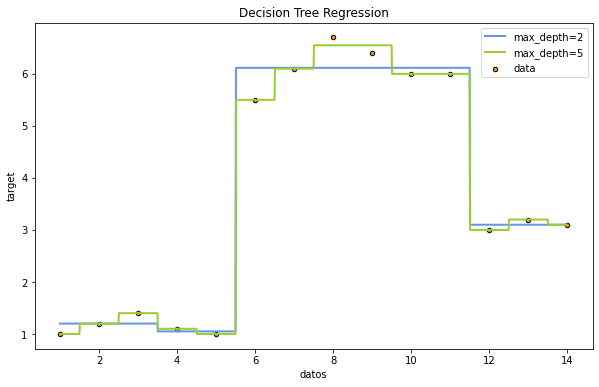

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(datos_df['X'], datos_df['y'], s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_2, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("datos")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Como puede observarse en la gráfica anterior, a medida que incrementamos el número de niveles del árbol de decisión, más se aproxima la curva de regresión a los puntos observados, y en esas situaciones podemos incurrir en un sobreajuste importante que haga que nuestro modelo no sirva para hacer predicciones sobre otros datos diferentes, que queden fuera del rango sobre el que hemos entrenado el modelo. 

# Ejemplo completo de Regresión.

Vamos a ver en este apartado un ejemplo completo sobre regresión utilizando el método que hemos visto en el capítulo anterior.

Comenzamos por cargar las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Leamos el fichero y veamos un resumen de su contenido

In [ ]:
#Descargamos los ficheros de Google Drive
#https://docs.google.com/spreadsheets/d/15nHlEBJ41OwkcBP8twbHCg15xYhDnivV/edit?usp=sharing&ouid=110883635766610081503&rtpof=true&sd=true
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=15nHlEBJ41OwkcBP8twbHCg15xYhDnivV' -O 'Datos_Tema2.xlsx'

--2022-06-27 04:25:21--  https://drive.google.com/uc?export=download&id=15nHlEBJ41OwkcBP8twbHCg15xYhDnivV
Resolving drive.google.com (drive.google.com)... 64.233.183.101, 64.233.183.113, 64.233.183.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.183.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/innlm4gao6q3860mt59b9gnvtl0kb1uh/1656303900000/14644984037434537262/*/15nHlEBJ41OwkcBP8twbHCg15xYhDnivV?e=download [following]
--2022-06-27 04:25:21--  https://doc-10-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/innlm4gao6q3860mt59b9gnvtl0kb1uh/1656303900000/14644984037434537262/*/15nHlEBJ41OwkcBP8twbHCg15xYhDnivV?e=download
Resolving doc-10-b0-docs.googleusercontent.com (doc-10-b0-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to doc-10-b0-docs.googleusercontent.com (doc-10-b0-docs

In [ ]:
df=pd.read_excel('Datos_Tema2.xlsx')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Thickness_ft,987.0,150.448933,52.452284,50.218753,123.462354,141.662622,166.707110,475.992627
Bulk Density_gg per cc,987.0,2.423001,0.019059,2.386117,2.409469,2.422639,2.433418,2.540608
Resistivity_ohmsm,987.0,3.892432,1.342193,1.680451,3.120852,3.650354,4.319585,15.970625
Effective Porosity_Fraction,987.0,0.061492,0.014805,0.017432,0.051250,0.061158,0.072289,0.096054
Clay Volume_ Fraction,987.0,0.271257,0.045289,0.153118,0.238607,0.264785,0.303776,0.413083
Water Saturation_Fraction,987.0,0.435876,0.080023,0.230041,0.372234,0.442414,0.490972,0.683304
TOC_Fraction,987.0,0.052630,0.005062,0.030830,0.051026,0.053662,0.056100,0.060907


A continuación vamos a visualizar la distribución de cada una de las features contenidas en el fichero

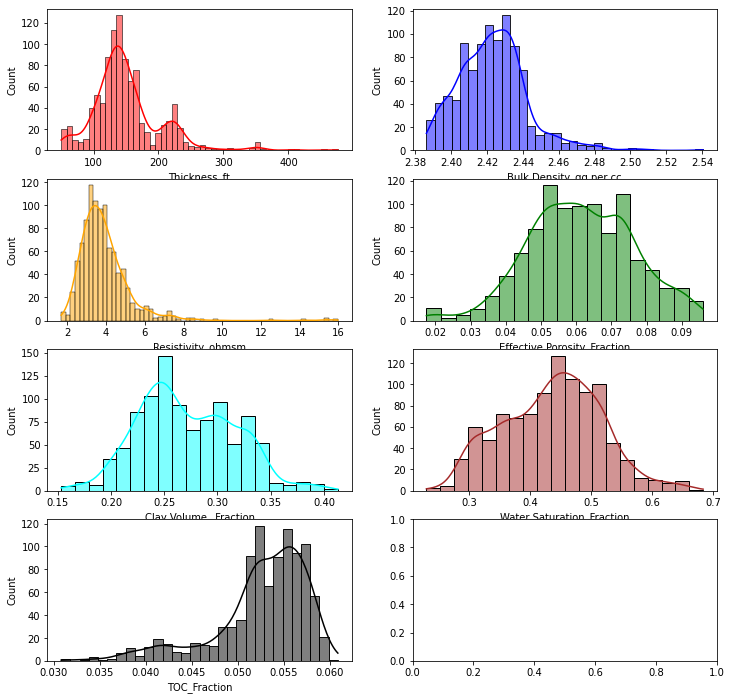

In [ ]:
f, axes=plt.subplots(4, 2, figsize=(12, 12))
sns.histplot(df['Thickness_ft'], color="red", kde=True, ax=axes[0,0])
sns.histplot(df['Bulk Density_gg per cc'], color="blue" , kde=True, ax=axes[0,1])
sns.histplot(df['Resistivity_ohmsm'], color="orange", kde=True, ax=axes[1,0] )
sns.histplot(df['Effective Porosity_Fraction'], color="green", kde=True, ax=axes[1,1])
sns.histplot(df['Clay Volume_ Fraction'], color="cyan", kde=True, ax=axes[2,0])
sns.histplot(df['Water Saturation_Fraction'], color="brown", kde=True, ax=axes[2,1])
sns.histplot(df['TOC_Fraction'], color="black", kde=True, ax=axes[3,0])
#plt.tight_layout()

También es interesante ver los diagramas de puntos dos a dos

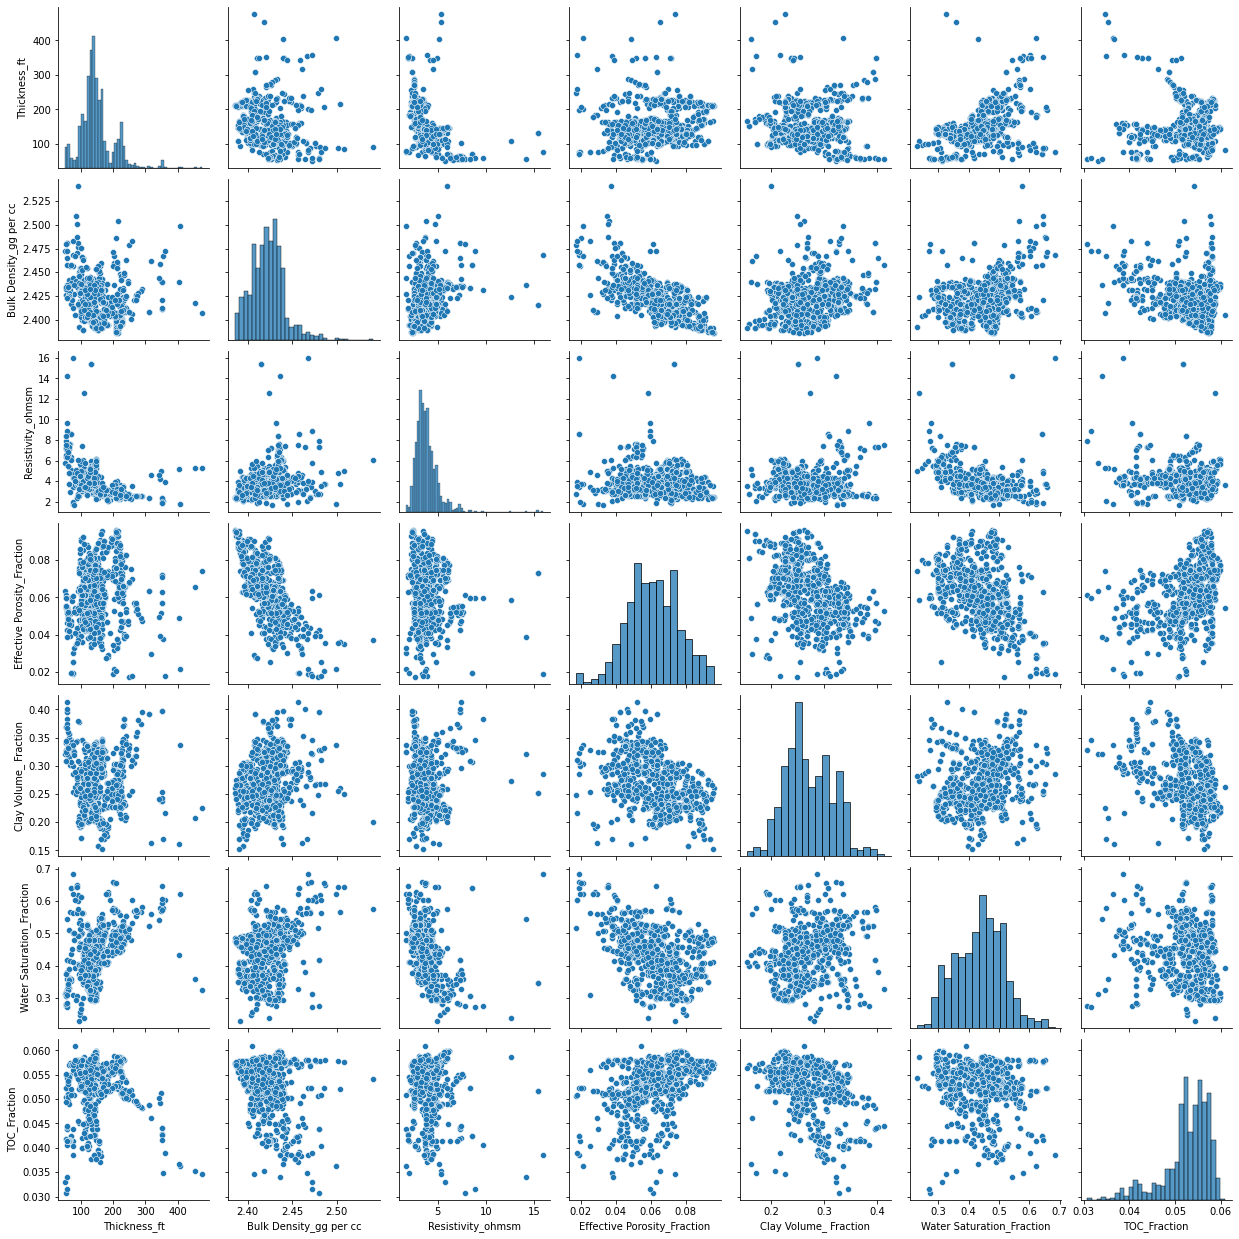

In [ ]:
sns.pairplot(df);

Al ser variables continuas, también podemos sacar la correlación de Pearson, de la siguiente manera

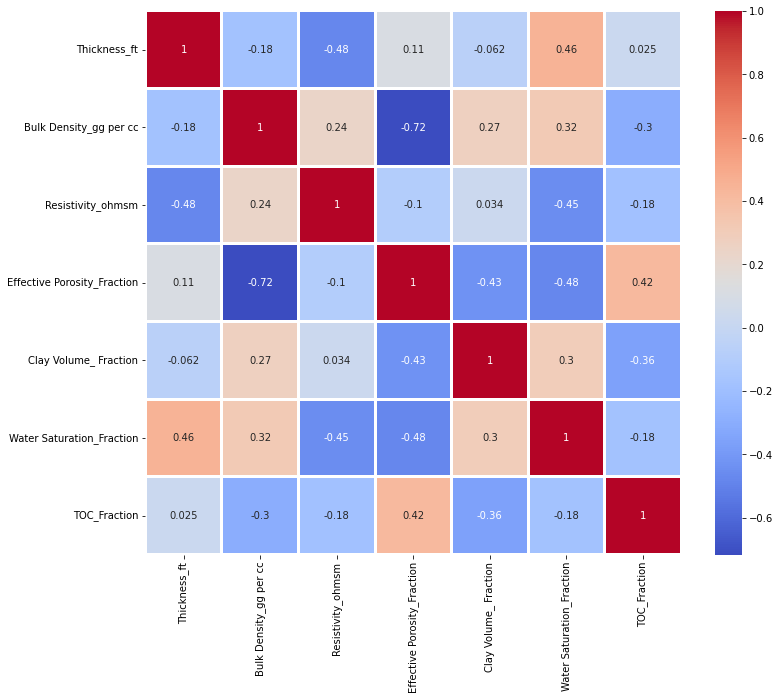

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',
linewidths=2, cmap='coolwarm');

Como podemos ver en el gráfico anterior hay dos variable con una correlación más bien alta igual a -0.72, por lo tanto lo que se podría hacer es dejar de lado una de las dos variables y trabajar solo con una, o hacer un PCA (análisis de componentes principales) y trabajar con los resultados que nos salgan de ese análisis. No obstante se va a seguir trabajando con las dos variable, y se deja al lector interesado trabajar sobre estas lineas y comparar los resultados que se obtengan de esos análisis. 

Vamos a preparar lo datos para elaborar el modelo. Seleccionamos los valores de la X y el de la y

In [ ]:
X=df.drop(['TOC_Fraction'], axis=1)
y=df['TOC_Fraction']

A continuación entresacamos los datos de train y de test

In [ ]:
from sklearn.model_selection import train_test_split
seed=1000
np.random.seed(seed)
X_train,X_test,y_train, y_test=train_test_split\
(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

A continuación definimos el modelo con una serie de hiperparámetros que ya se ha explicado anteriormente su significado.

In [ ]:
np.random.seed(seed)
# creamos el modelo
dtree=DecisionTreeRegressor(criterion='mse', splitter='best',
max_depth=None, min_samples_split=4, min_samples_leaf=2,
max_features=None,ccp_alpha=0)

In [ ]:
# ajustamos el modelo
dtree.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(ccp_alpha=0, criterion='mse', min_samples_leaf=2,
                      min_samples_split=4)

In [ ]:
y_pred_train=dtree.predict(X_train)
y_pred_test=dtree.predict(X_test)

A continuación procedemos a calcular $R^2$ de la siguiente manera:

In [ ]:
# Primero para los datos de entrenamientp
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]
print('Rˆ2 de los datos entreamiento =',round(corr_train**2,4),'R=',
round(corr_train,4))

Rˆ2 de los datos entreamiento = 0.9758 R= 0.9878


In [ ]:
# ahora para los daatos test
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]
print('Rˆ2 de los datos test =',round(corr_test**2,4),'R=',
round(corr_test,4))

Rˆ2 de los datos test = 0.676 R= 0.8222


Como resultado de todo esto podemos ver que los datos de $R^2$ son muy diferentes entre el entrenamiento y el test, por lo tanto habría que ver si se puede mejorar este ajuste mediante una serie de cambios de parámetros ( [Grid search optimization](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)), por ejemplo utilizando [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), o bien [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Para hacernos una idea de cómo están los datos, vamos a hacer una representación gráfica comparativa de los datos de entrenamiento y sus valores predichos.

Text(0.5, 1.0, 'TOC Datos de entrenamiento reales Vs. Predichos')

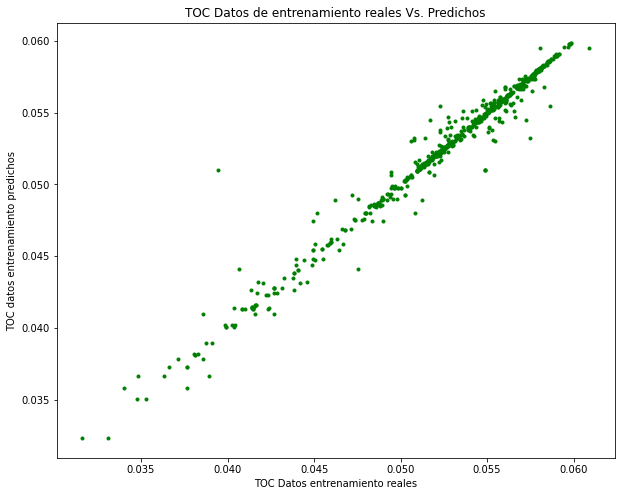

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'g.')
plt.xlabel('TOC Datos entrenamiento reales')
plt.ylabel('TOC datos entrenamiento predichos')
plt.title('TOC Datos de entrenamiento reales Vs. Predichos')

Hagamos lo mismo para los datos de test

Text(0.5, 1.0, 'TOC Datos de test reales Vs. Predichos')

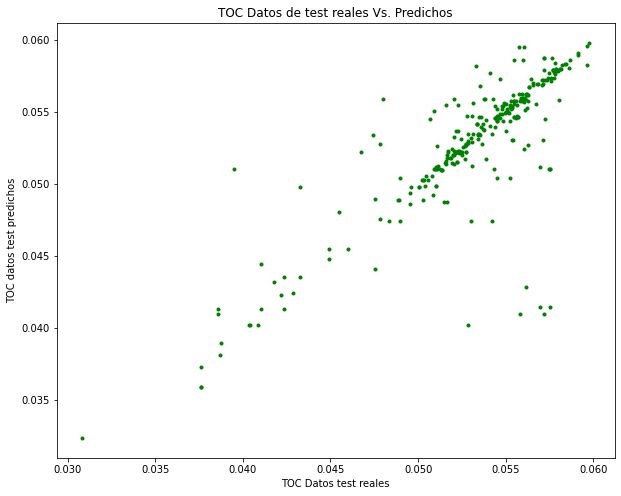

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'g.')
plt.xlabel('TOC Datos test reales')
plt.ylabel('TOC datos test predichos')
plt.title('TOC Datos de test reales Vs. Predichos')

En estos dos gráficos podemos ver con toda claridad la diferencia que hay en la distribución de estas dos magnitudes, y claramente en el segundo gráfico se puede observar la mayor dispersión que existe para los datos de test, lo que indica que existe un sobreajuste en el método utilizado.

Además de las métricas anteriores, vamos a obtener alguna más: MAE, MSE, RMSE 

In [ ]:
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test,
y_pred_test),5))

print('MSE:', round(metrics.mean_squared_error(y_test,
y_pred_test),5))

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test,
y_pred_test)),5))

MAE: 0.00127
MSE: 1e-05
RMSE: 0.00281


Una característica importante de estos métodos, implementados en scikip learn es que podemos ver la importancia de cada feature, mediante el método "dtree.featureimportances_". Veamos esto a continuación:

In [ ]:
dtree.feature_importances_

array([0.29480062, 0.11144798, 0.13927387, 0.24215981, 0.13646896,
       0.07584876])

Hagamos un gráfico, para ver estos datos

Text(0.5, 1.0, 'Ranking de Feature Importance')

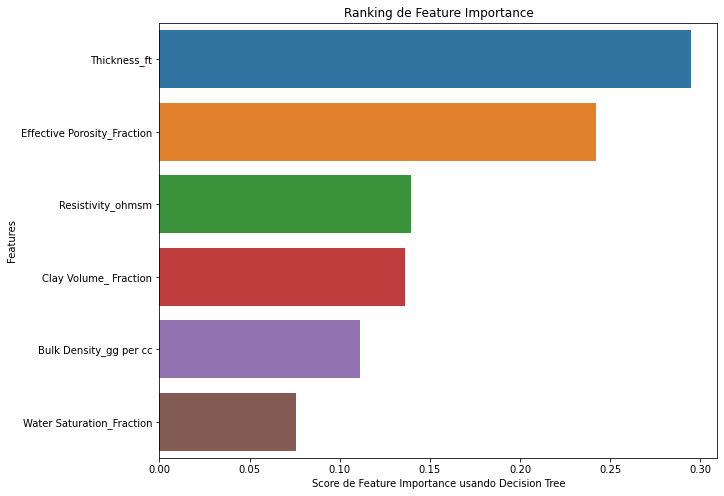

In [ ]:
feature_names=df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp=pd.Series(dtree.feature_importances_,
index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Feature Importance usando Decision Tree')
plt.ylabel('Features')
plt.title("Ranking de Feature Importance")

Para profundizar un poco más en este estudio, vamos a realizar una validación cruzada utilizando para ello un total de 5 folds.

In [ ]:
from sklearn.model_selection import cross_val_score

np.random.seed(seed)

scores_R2=cross_val_score(dtree, X, y,cv=5,scoring='r2')
print(" R2_Cross-validation scores: {}". format(scores_R2))

 R2_Cross-validation scores: [0.66616785 0.56835982 0.5223478  0.62668483 0.77734923]


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [ ]:
print(" Promedio de  R2_Cross-validation scores: {}".
format(scores_R2.mean()))

 Promedio de  R2_Cross-validation scores: 0.6321819058443482
